# Modelo - (SVR)
## Curso: Inteligencia de Negocios
## Docente: Ernesto Cancho Rodriguez

### Importamos librerías

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf #usamos yf porque stockai da problemas para traer la data
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 

%matplotlib inline

### Usaremos la acción de Meta para el caso

In [32]:
meta = yf.Ticker('META')
df = pd.DataFrame(meta.history(period='max',auto_adjust=True))
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.loc[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-01-30')]
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1665,2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200,0.0,0.0
1666,2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900,0.0,0.0
1667,2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100,0.0,0.0
1668,2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300,0.0,0.0
1669,2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800,0.0,0.0


### Usamos esta función para obtener arreglos con las fechas y precios de cierres

In [33]:
def get_data(df):  
    data = df.copy()
    data['Date'] = data['Date'].str.split('-').str[2]
    data['Date'] = pd.to_numeric(data['Date'])
    return [ data['Date'].tolist(), data['Close'].tolist() ] # Convert Series to list
dates, prices = get_data(df)

### Creamos modelo y empezamos a predecir

In [34]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1xn dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    # Fit regression model
    svr_lin .fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

### Obtenemos la predicción y graficamos

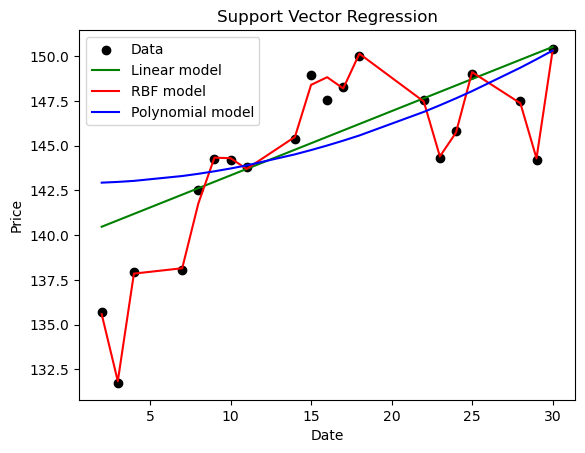

(163.82754728466006, 150.87894528057487, 150.81836497874733)

In [35]:
predicted_price = predict_prices(dates, prices, [31])
predicted_price

### Como podemos visualizar todos llegan al mismo crecimiento en un mes, la cuestión es la variabilidad que presenta cada modelo, el modelo RBF presenta picos muy marcados de subida y bajada (lo cual es lo más realista), mientras que los demás modelos nos permiten visualizarlo de una manera más constante por así decirlo